# Tarea 2
## Francisco Javier Peralta Ramírez

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

import warnings
sp.init_printing()
warnings.filterwarnings('ignore')

In [2]:
def adam(f, gradf, x0, nIter, alpha):
    pass

In [100]:
def nag(f, gradf, x0, nIter, alpha, eta):
    assert alpha > 0 and eta > 0#positive step size
    a, e, x = alpha, eta, x0
    #primer paso es desenso de gradiente...
    p = gradf(x)
    fx = [f(x)]
    x = x - a * p
    #empieza NAG
    fx.append(f(x))
    for i in range(nIter - 1): #ya hicimos la primera iteracion...
        xn = x - a * p #tomamos el paso anterior
        gt = gradf(xn)
        p = e * p + gt #nueva dir
        x = xn - a * p
        fx.append(f(x))
    return np.array(fx)

In [101]:
def adagrad(f, gradf, x0, nIter, alpha, epsilon = 0.001):
    x = x0
    g2 = np.zeros_like(x)
    fx = [f(x)]
    for i in range(nIter):
        g = gradf(x)
        g2 += g**2 #suma cuadrada de gradientes
        n = alpha / np.sqrt(g2 + epsilon)
        x = x - n * g
        fx.append(f(x))
    return np.array(fx)

In [143]:
def adam(f, gradf, x0, nIter, alpha, beta = (0.9, 0.999), epsilon = 1E-8):
    x = x0
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    fx = [f(x)]
    
    for i in range(nIter):
        g = gradf(x)
        m = beta[0] * m + (1 - beta[0]) * g    #decaying avg momentum
        v = beta[1] * v + (1 - beta[1]) * g**2 #decaying velocity
        #bias corrected first and second moments
        mh = m / ( 1 - beta[0])
        vh = v / ( 1 - beta[1])
        x = x - alpha * mh / (np.sqrt(vh) + epsilon)
        fx.append(f(x))
    return fx

Codificamos la función rosembrock como un simple **for**

In [37]:
def rosenbrock(x):
    fx = 0
    for i in range(len(x) - 1):
        fx += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return fx

Como la función *rosenbrock* admite cualquier tipo (i.e. no se hace chequeo de tipos) podemos pasar simbolos de *sympy*

In [38]:
x = sp.symbols('x1:3')
rosenbrock(x)

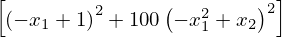

In [39]:
ros = sp.Matrix([rosenbrock(x)])
ros

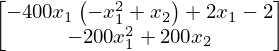

In [40]:
jacRos = ros.jacobian(x).T
jacRos

Podemos evaluar el resultado del gradiente usando la función **subs** la cual substituye las variables por valores, esta requiere un parámetro de la forma ***[ (old, new), ... ]*** donde *old* es la variable a remplazar y *new* el valor.

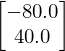

In [41]:
x0 = [1, 1.2]
evalJ = jacRos.subs([(x[i], x0[i]) for i in range(len(x0))])
evalJ

Podemos juntar todo esto para crear una función que regresa el gradiente

In [42]:
def sym_grad(f, x):
    x_s = sp.symbols('x0:{}'.format(len(x)))
    mtx = sp.Matrix([f(x_s)])
    jac = mtx.jacobian(x_s)
    evl = jac.subs([(x_s[i], x[i]) for i in range(len(x0))])
    return np.array( [float(v) for v in evl])
sym_grad(rosenbrock, x0) #comprobamos funcionamiento

def sym_grad_batch(f, x, syms):
    pass

array([-80.,  40.])

In [43]:
def rosenbrock_grad(x):
    return sym_grad(rosenbrock, x) 

In [103]:
nag(rosenbrock, rosenbrock_grad, x0, 10, 0.001, 0.2)

array([4.        , 0.010496  , 0.01519294, 0.1931574 , 0.01465906,
       0.05045281, 0.01124561, 0.01510121, 0.00710525, 0.00702112,
       0.00520279])

In [142]:
adagrad(rosenbrock, rosenbrock_grad, x0, 10, 0.1)

array([4.        , 1.21999893, 0.24952355, 0.03511411, 0.00849597,
       0.00468432, 0.00416825, 0.00409292, 0.00407812, 0.00407154,
       0.00406609])

In [141]:
adam(rosenbrock, rosenbrock_grad, x0, 10, 0.1)

Comparamos los resultados de **NAG, ADAGRAD, ADAM** para *Rosenbrock* con $n = 2$ y $x_0 = [-1.2, 1]$

In [215]:
def plot_res(nag_res, adagrad_res, adam_res):
    f, ax = plt.subplots(1, 2, figsize=(24, 8))

    ax[0].plot(nag_res, label="NAG")
    ax[0].plot(adagrad_res, label="ADAGRAD")
    ax[0].plot(adam_res, label="ADAM")
    ax[0].legend()

    ax[1].plot(nag_res)
    ax[1].plot(adagrad_res)
    ax[1].plot(adam_res)
    ax[1].set_xlim(n_iter - 10, n_iter)
    ax[1].set_ylim(-0.0001, np.ceil(adagrad_res[-1]))
    plt.show()

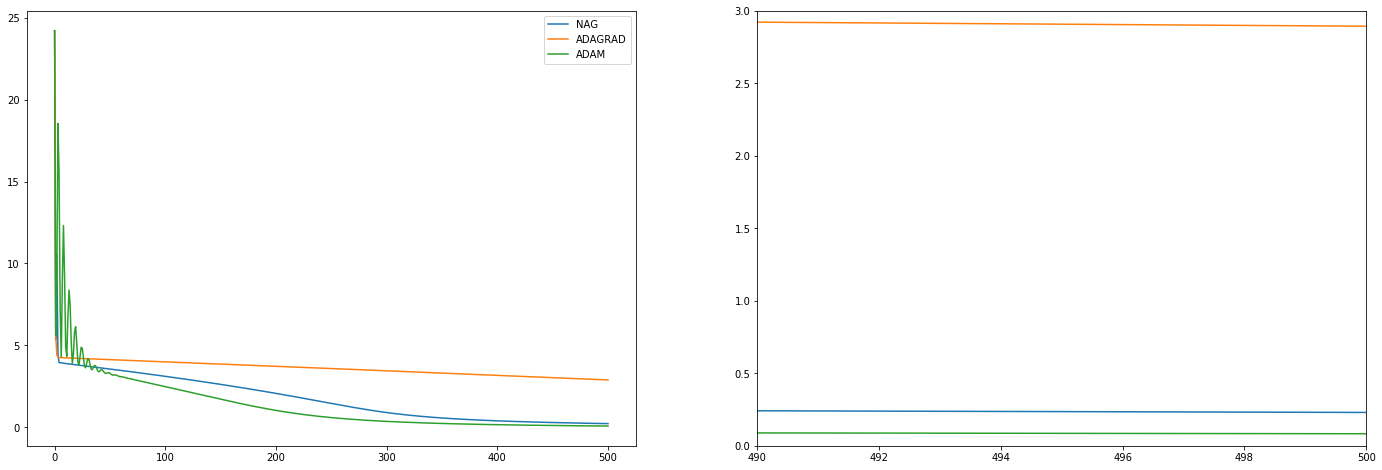

NAG: 0.23003097789834506	ADAGRAD: 2.894452562225039	ADAM: 0.08307235516583095
CPU times: user 4.66 s, sys: 62.3 ms, total: 4.72 s
Wall time: 4.76 s


In [217]:
%%time
x0 = [-1.2, 1]
n_iter = 500
nag_res = nag(rosenbrock, rosenbrock_grad, x0, n_iter, 0.001, 0.2)
adagrad_res = adagrad(rosenbrock, rosenbrock_grad, x0, n_iter, 0.1)
adam_res = adam(rosenbrock, rosenbrock_grad, x0, n_iter, 0.1)

plot_res(nag_res, adagrad_res, adam_res)
print("NAG: {0}\tADAGRAD: {1}\tADAM: {2}".format(nag_res[-1], adagrad_res[-1] , adam_res[-1]))

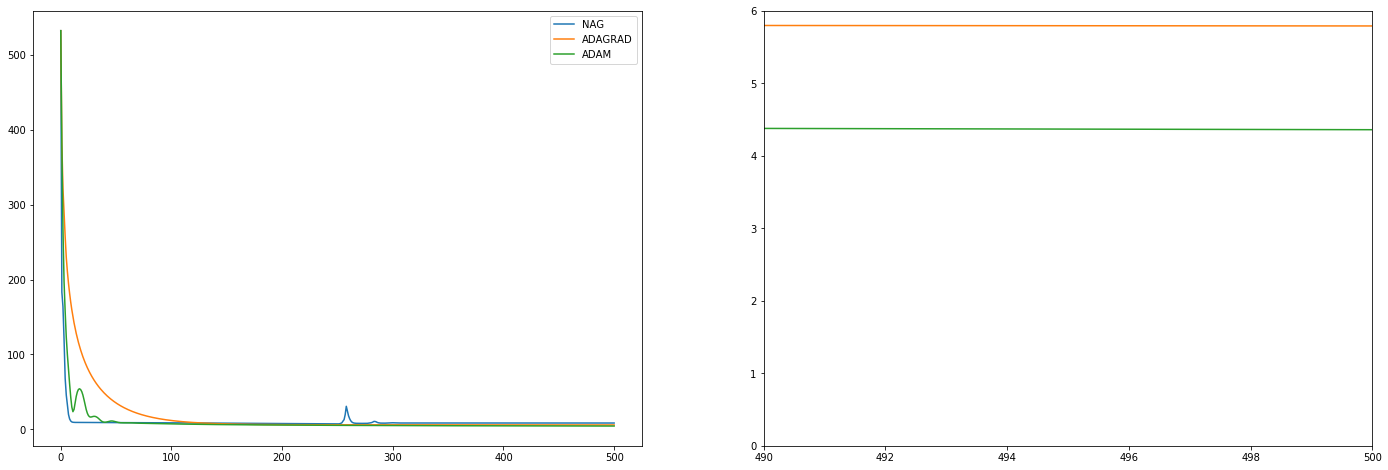

NAG: 8.387514565407447	ADAGRAD: 5.792575982598244	ADAM: 4.361043228892379
CPU times: user 1min 8s, sys: 369 ms, total: 1min 9s
Wall time: 1min 9s


In [218]:
%%time
x0 = np.ones((10))
x0[0] = x0[-2] = -1.2
n_iter = 500
nag_res = nag(rosenbrock, rosenbrock_grad, x0, n_iter, 0.001, 0.2)
adagrad_res = adagrad(rosenbrock, rosenbrock_grad, x0, n_iter, 0.1)
adam_res = adam(rosenbrock, rosenbrock_grad, x0, n_iter, 0.1)

plot_res(nag_res, adagrad_res, adam_res)
print("NAG: {0}\tADAGRAD: {1}\tADAM: {2}".format(nag_res[-1], adagrad_res[-1] , adam_res[-1]))

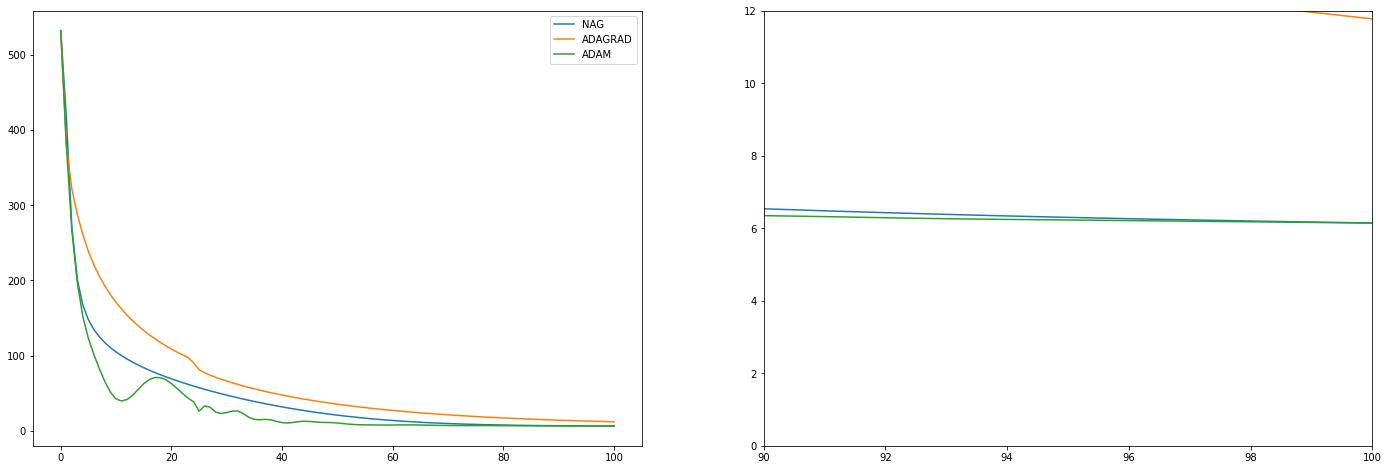

NAG: 6.148976198335896	ADAGRAD: 11.780501143169777	ADAM: 6.144879378532144
CPU times: user 4min 26s, sys: 583 ms, total: 4min 27s
Wall time: 4min 27s


In [225]:
%%time
x0 = np.ones((50))
x0[0] = x0[-2] = -1.2
n_iter = 100
nag_res = nag(rosenbrock, rosenbrock_grad, x0, n_iter, 0.0001, 0.2)
adagrad_res = adagrad(rosenbrock, rosenbrock_grad, x0, n_iter, 0.1)
adam_res = adam(rosenbrock, rosenbrock_grad, x0, n_iter, 0.1)

plot_res(nag_res, adagrad_res, adam_res)
print("NAG: {0}\tADAGRAD: {1}\tADAM: {2}".format(nag_res[-1], adagrad_res[-1] , adam_res[-1]))